# Indicators of Heavy Traffic on I-94

The objective of our project is to examine data related to the traffic flow in the westbound direction (only cars moving from east to west are measured) of the I-94 highway, with the aim of identifying certain signs of high traffic volume, such as the weather conditions, the time of day, or the day of the week. 

The I-94 Traffic Dataset, which has been provided by John Hogue and can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume), will be utilized for our analysis.

In [1]:
import pandas as pd
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(traffic_data.head())
print(traffic_data.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [3]:
print(traffic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


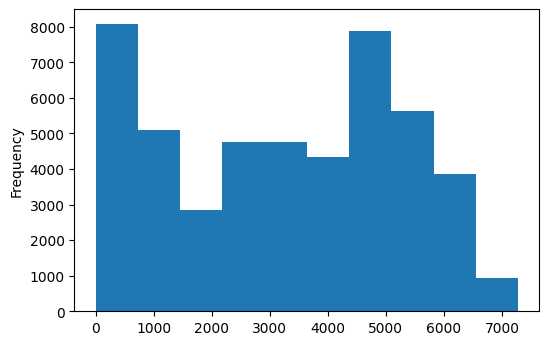

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic_data['traffic_volume'].plot.hist()
plt.show()

In [5]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

To analyze the distribution of traffic during the day and night, we need to split the dataset into two separate series. However, in order to do that, we must first convert the "date_time" column into a datetime object.

In [6]:
traffic_data['date_time'].describe()

count                   48204
unique                  40575
top       2013-04-18 22:00:00
freq                        6
Name: date_time, dtype: object

In [7]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

In [8]:
traffic_data['date_time'].describe()

count                   48204
unique                  40575
top       2013-04-18 22:00:00
freq                        6
first     2012-10-02 09:00:00
last      2018-09-30 23:00:00
Name: date_time, dtype: object

In [9]:
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [10]:
day_time = [*range(7,19)]
night_time = [*range(19,24)]
night_time.extend([*range(0,7)])
print('{0} \n {1}'.format(day_time, night_time))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 
 [19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6]


In [26]:
traffic_night = traffic_data.copy()[traffic_data['hour'].isin(night_time)]
traffic_day = traffic_data.copy()[traffic_data['hour'].isin(day_time)]

In [27]:
print(traffic_night.head())
print(traffic_day.head())

   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   
13    None  287.16      0.0      0.0           1        Clear   
14    None  285.45      0.0      0.0           1        Clear   

   weather_description           date_time  traffic_volume  hour  
10          few clouds 2012-10-02 19:00:00            3539    19  
11        sky is clear 2012-10-02 20:00:00            2784    20  
12        sky is clear 2012-10-02 21:00:00            2361    21  
13        sky is clear 2012-10-02 22:00:00            1529    22  
14        sky is clear 2012-10-02 23:00:00             963    23  
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.

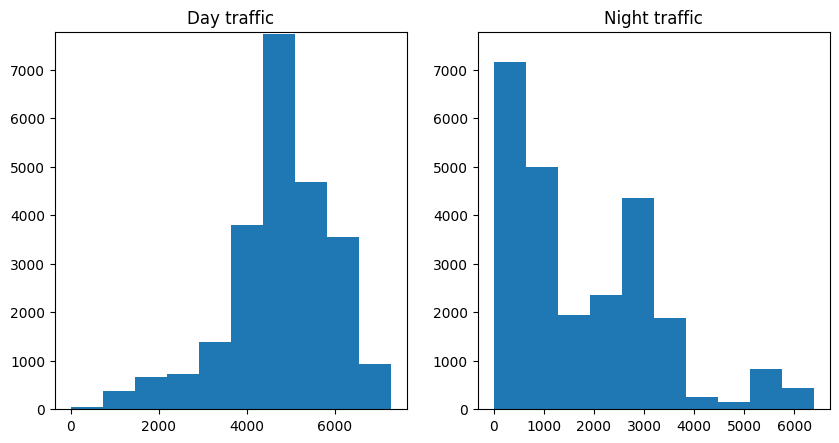

In [28]:
datasets = {'Day traffic': traffic_day, 'Night traffic': traffic_night}

correction_val = 500
min_night = traffic_night['traffic_volume'].min()
min_day = traffic_day['traffic_volume'].min()
max_night = traffic_night['traffic_volume'].max()
max_day = traffic_day['traffic_volume'].max()

min_v = min_day if (min_day < min_night) else min_night
max_v = (max_day if (max_day > max_night) else max_night ) + correction_val

plt.figure(figsize = (10,5))
for d,i in zip(datasets, [1,2]):
    plt.subplot(1,2,i)
    plt.hist(datasets[d]['traffic_volume'])
    plt.title(d)
    plt.ylim([min_v, max_v])
plt.show()



In [29]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Observations

The distribution of traffic volume throughout the day is indicated by a left-skewed histogram, implying that the majority of traffic volume values are high, with 4,252 or more cars passing the station per hour 75% of the time (as 25% of the values are less than 4,252).

On the other hand, the histogram representing nighttime data is right-skewed, indicating that most of the traffic volume values are low. About 75% of the time, the number of cars passing the station each hour was less than 2,819, despite occasional measurements of over 5,000 cars per hour.

Given our objective of identifying indicators of heavy traffic, we will concentrate solely on daytime data, as the traffic is usually light at night.

## Time as a traffic factor

We will examine several line plots to investigate how the traffic volume fluctuates based on the following factors:

- Month
- Day of the week
- Time of day

As I mentioned before, only daytime will be taken into consideration.
These plots could help identify patterns and trends that indicate heavy traffic during specific periods. By analyzing these indicators, we may be able to develop a better understanding of when traffic congestion is most likely to occur and how to mitigate it.

In [30]:
traffic_day['month'] = traffic_day.copy()['date_time'].dt.month

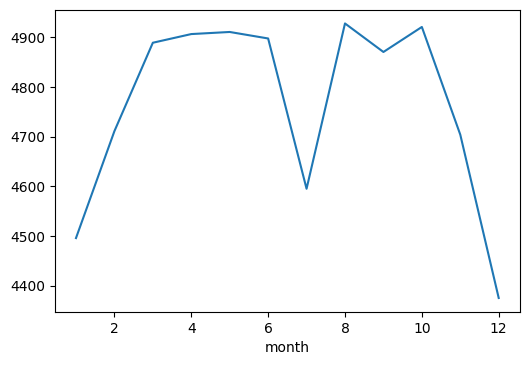

In [31]:
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume'].plot.line()

The traffic volume appears to be lighter during the cold months (November-February) and heavier during the warm months (March-October), with one notable exception: July. We must investigate if there is anything noteworthy about July and whether traffic is consistently lighter during that month.

To answer the latter question, we should examine how the traffic volume varies every year during July.

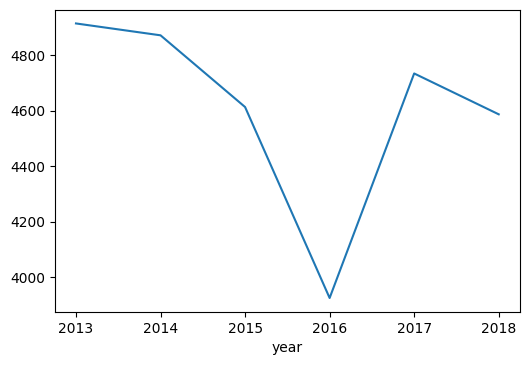

In [32]:
traffic_day['year'] = traffic_day.copy()['date_time'].dt.year
only_july = traffic_day[traffic_day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

In [33]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek

In general, July appears to have heavy traffic similar to the other warm months. However, one exceptional year is 2016, which experienced a significant reduction in traffic volume.

In [34]:
by_dayofweek = traffic_day.groupby('dayofweek').mean()

In [35]:
by_dayofweek['traffic_volume'] #O Monday 6 Sanday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

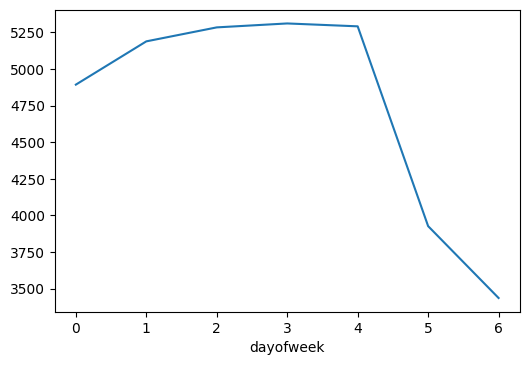

In [36]:
by_dayofweek['traffic_volume'].plot.line()

Traffic volume is significantly heavier on business days (Monday – Friday).

In [37]:
week_days = traffic_day.copy()[traffic_day['dayofweek'] <=4]

In [38]:
weekends = traffic_day.copy()[traffic_day['dayofweek'] > 4]

In [39]:
by_hours_business = week_days.groupby('hour').mean()
by_hours_business.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek
hour,,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,2015.562712,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,2015.493234,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,2015.548924,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,2015.526738,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,2015.528275,1.979957


In [41]:
by_hours_weekends = weekends.groupby('hour').mean()
by_hours_weekends.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek
hour,,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,2015.442053,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,2015.471761,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,2015.495667,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,2015.458763,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,2015.549550,5.491892


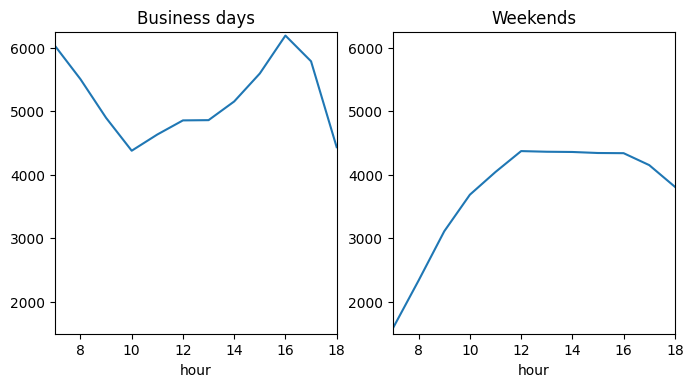

In [42]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
by_hours_business['traffic_volume'].plot.line()
plt.title('Business days')
plt.ylim(1500, 6250)
plt.xlim(7, 18)
plt.subplot(1,2,2)
by_hours_weekends['traffic_volume'].plot.line()
plt.title('Weekends')
plt.ylim(1500, 6250)
plt.xlim(7, 18)
plt.show()

In summary, we have identified several time-related indicators of heavy traffic:

- Traffic tends to be heavier during warm months (March-October) than during cold months (November-February).
- Traffic is significantly heavier on business days (Monday-Friday) compared to weekends.
- Rush hours on business days typically occur around 7am and 4pm.

## What about the weather as a traffic indicator?

We can start from numerical data using corr function. Below we can see that there is very weak (if any) correlation between the temperature and the traffic but there is no correlation with other wheater indicators.

In [43]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

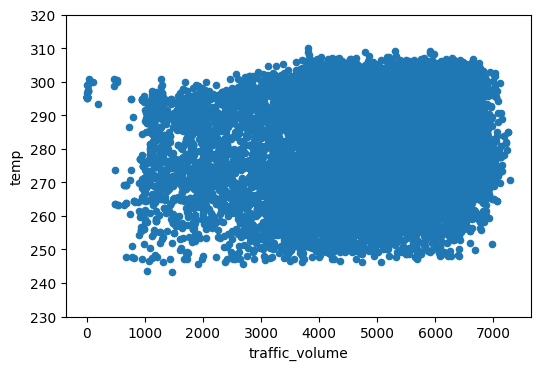

In [44]:
traffic_day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()

Now, let's look at the correlation between the traffic and categorical data (columns: weather_main and weather_description)

In [45]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

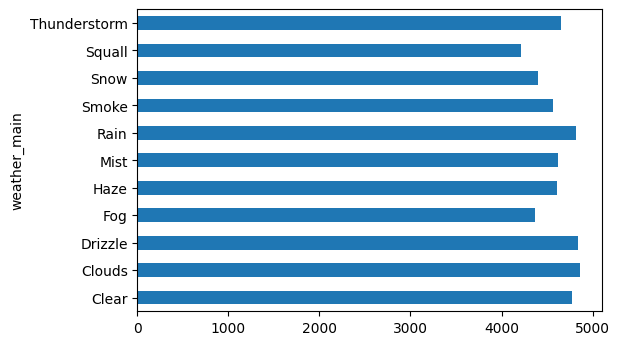

In [46]:
by_weather_main['traffic_volume'].plot.barh()

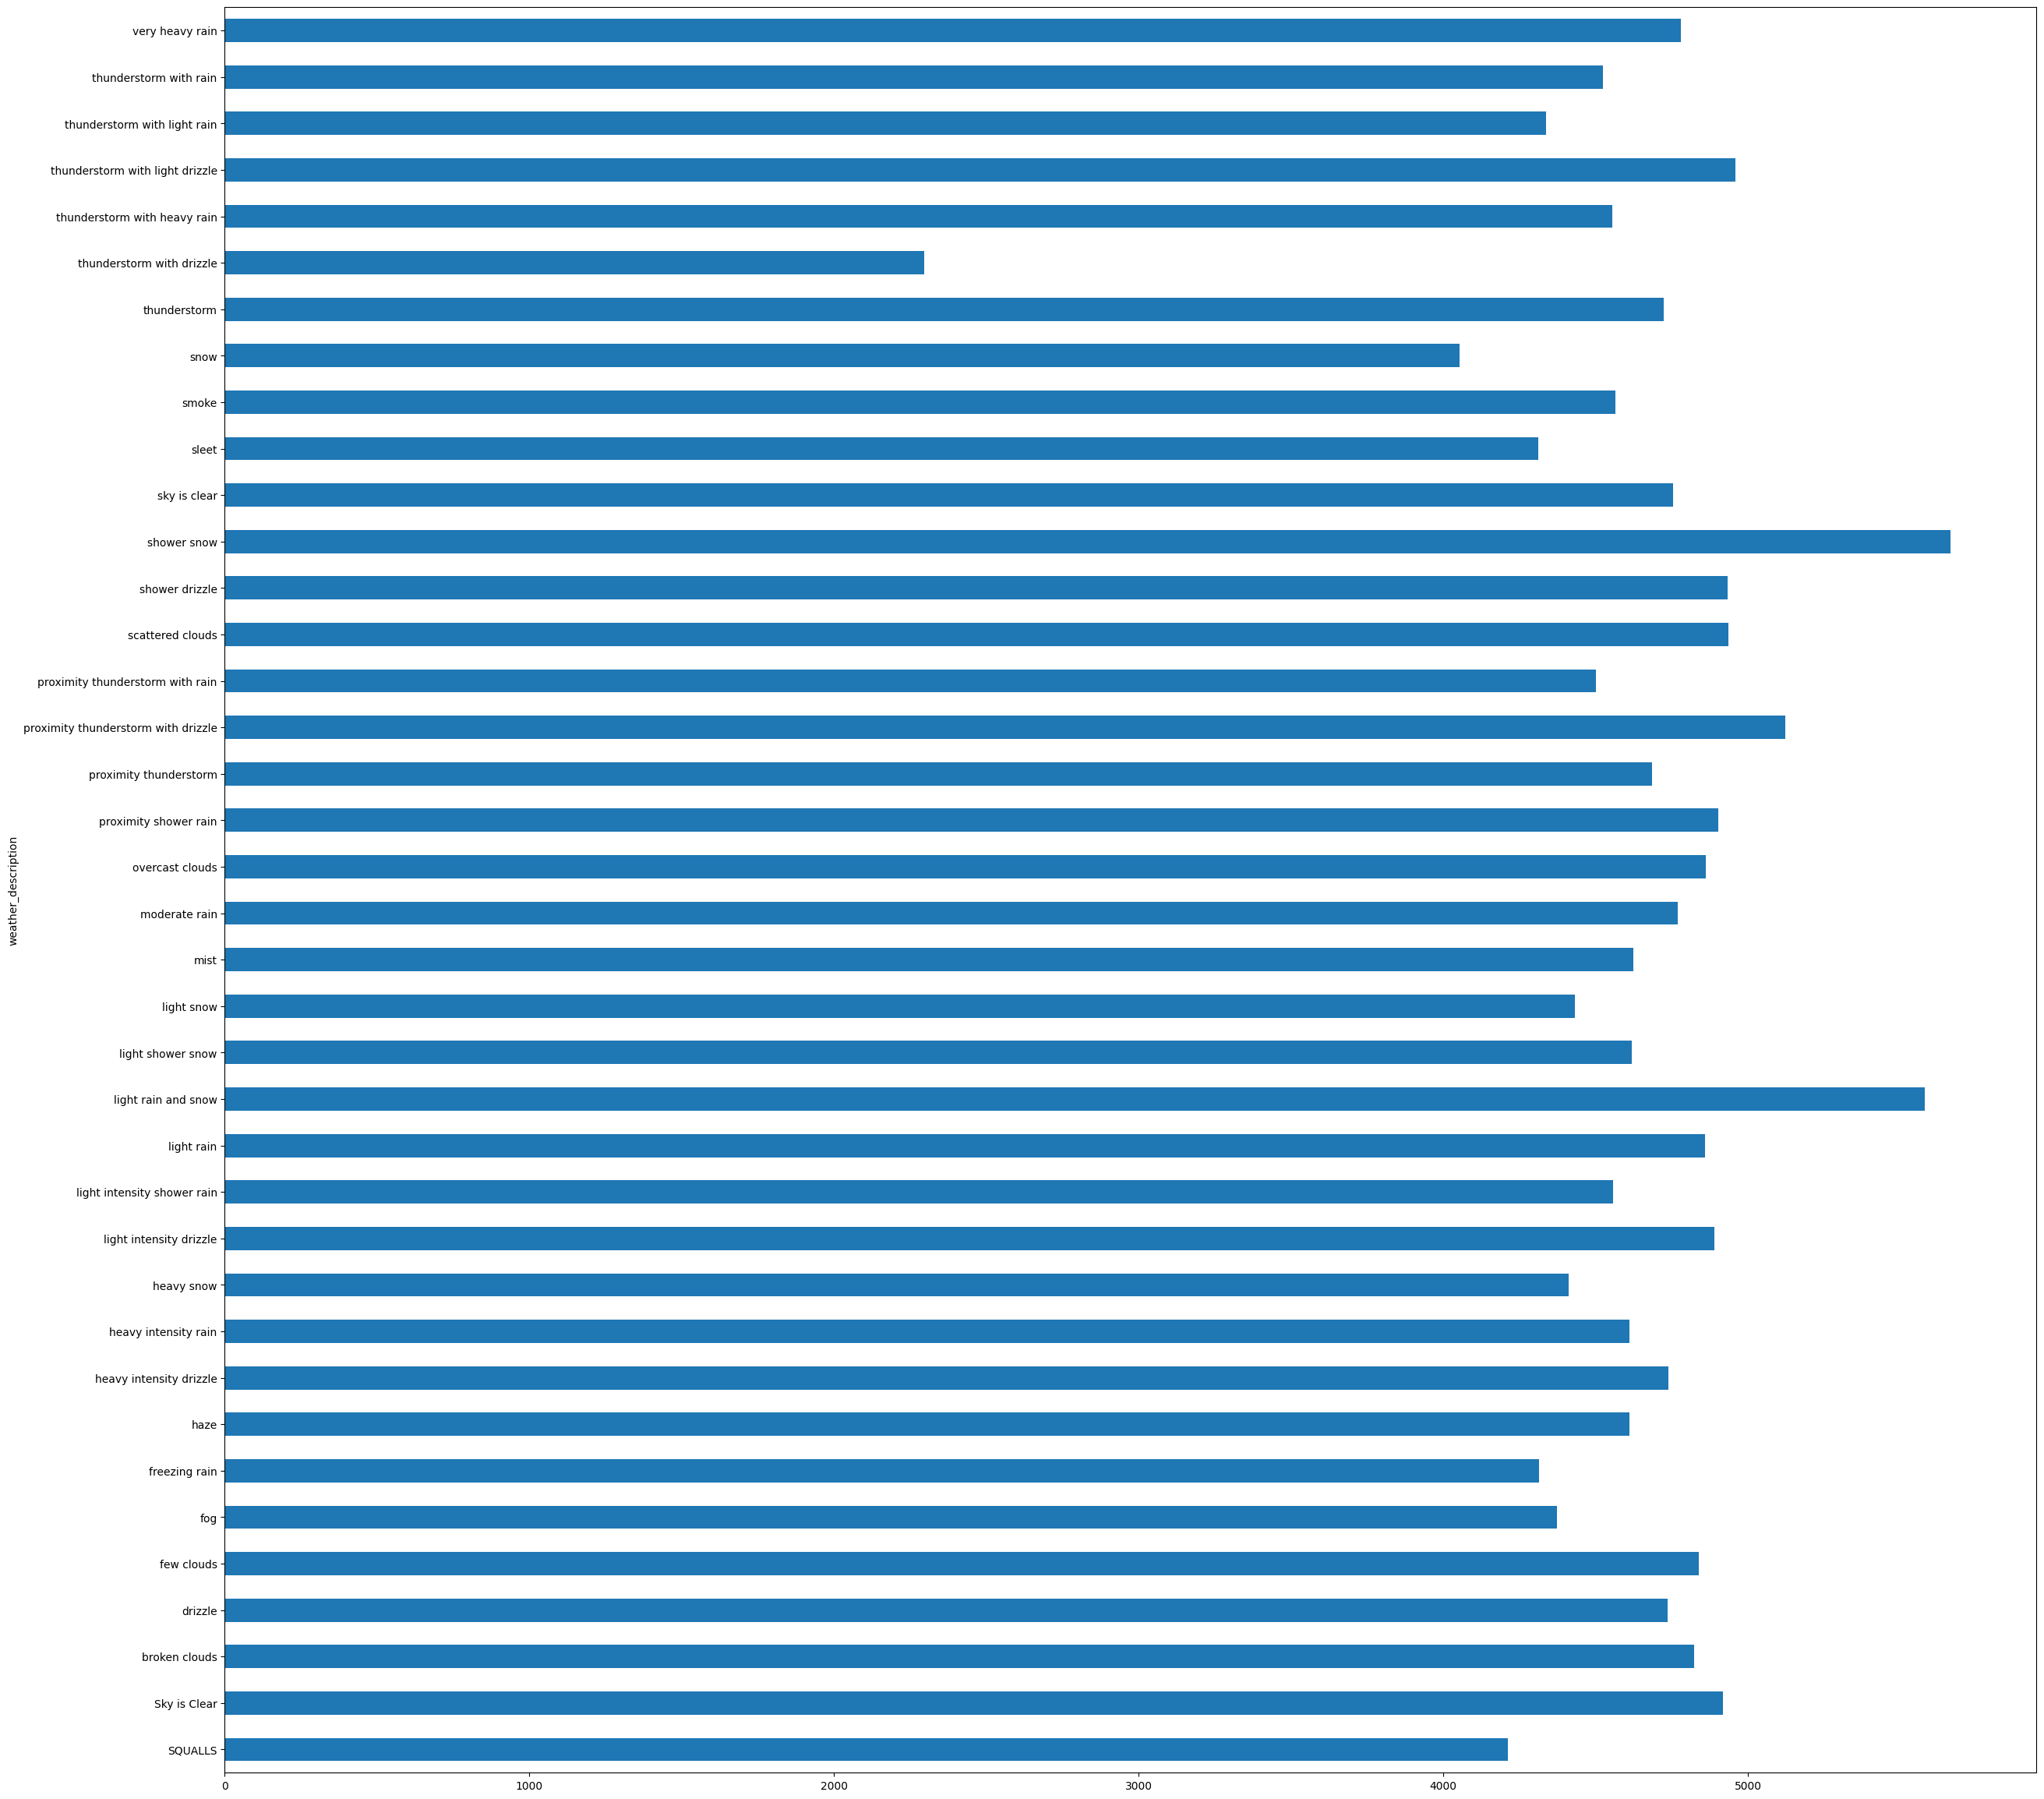

In [47]:
by_weather_description['traffic_volume'].plot.barh(figsize = (30,30))


## Conclusions

o conclude, this project aimed to identify indicators of heavy traffic on the I-94 Interstate highway. We were successful in identifying two types of indicators: time-related and weather-related. The time-related indicators showed that traffic is typically heavier during warm months, on business days, and during rush hours around 7am and 4pm. The weather-related indicators showed that certain weather conditions, such as shower snow, light rain and snow, and proximity thunderstorms with drizzle, are associated with heavier traffic. These findings could help transportation authorities and drivers make informed decisions and plan accordingly to minimize traffic congestion and enhance traffic flow.